# Anàlisi de les dades

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import shapiro

In [2]:
# Carregar dades
data_dir = "/kaggle/input/co2-clean/" #Modificar amb la vostra ruta

df = pd.read_csv(data_dir + "co2_records_analisi.csv")
display(df.sample(n=5))

extra_df = pd.read_csv(data_dir + "co2_additional.csv")
display(extra_df.sample(n=5))

,date_time,month,w_day,hour,mint,location,sensor_id,temp,hum,co2,m_day,imputed,occupied,d_record
11935,2021-06-22 17:20:00+02:00,Jun,Tue,17,20,Albea,CO2_02,30.64,42.290000,430.0,22,0,0,208
36986,2021-05-07 06:20:00+02:00,May,Fri,6,20,SantMiquel,CO2_05,26.10,44.006348,480.0,7,0,0,76
42403,2021-05-11 18:55:00+02:00,May,Tue,18,55,SantMiquel,CO2_03,24.60,33.400000,445.0,11,0,0,227
29035,2021-06-04 02:05:00+02:00,Jun,Fri,2,5,Albea,CO2_06,29.14,48.470000,430.0,4,0,0,25
52233,2021-05-18 02:25:00+02:00,May,Tue,2,25,SantMiquel,CO2_06,24.30,46.400000,475.0,18,0,0,29


,sensor_id,location,grade,students,square_metres,windows,orientation,location_id,orientation_id,grade_scaled,students_scaled,square_metres_scaled,windows_scaled
2,CO2_03,SantMiquel,4,15,43.37,4,Street,0,1,0.6,0.090909,0.226850,0.5
8,CO2_03,Albea,4,16,67.00,4,Playground,1,0,0.6,0.181818,0.934972,0.5
1,CO2_02,SantMiquel,6,18,43.37,4,Street,0,1,1.0,0.363636,0.226850,0.5
5,CO2_06,SantMiquel,3,17,43.37,4,Street,0,1,0.4,0.272727,0.226850,0.5
9,CO2_04,Albea,5,14,69.17,4,Playground,1,0,0.8,0.000000,1.000000,0.5


In [3]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Conjunt desvalancejat?

In [4]:
total_records = len(df)
location_stats = df.groupby([ 'location']).agg(
    num_records=('date_time', 'count')
).reset_index()
location_stats['percentage_of_total'] = round((location_stats['num_records'] / total_records) * 100,2)

display(location_stats)

,location,num_records,percentage_of_total
0,Albea,36248,47.03
1,SantMiquel,40830,52.97


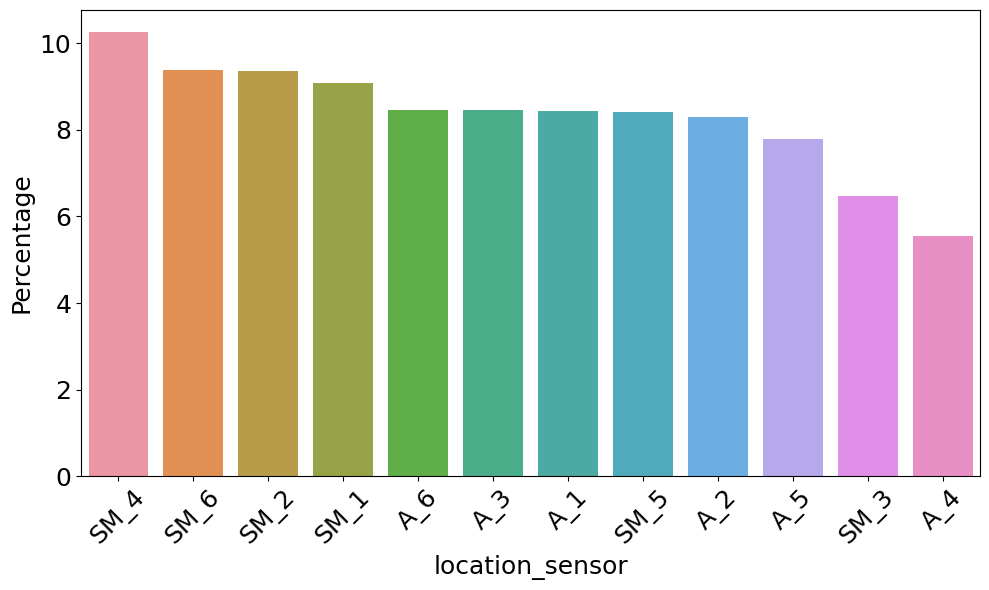

In [5]:
sensor_location_stats = df.groupby([ 'location','sensor_id']).agg(
    num_records=('date_time', 'count')
).reset_index().sort_values(by='num_records', ascending=False)
sensor_location_stats['percentage_of_total'] = round((sensor_location_stats['num_records'] / total_records) * 100,2)
sensor_location_stats['location_sensor'] = sensor_location_stats['location'].map({"SantMiquel" : "SM", "Albea" : "A"}) + '_' + sensor_location_stats['sensor_id'].apply(lambda x: x[-1])

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x='location_sensor', y='percentage_of_total', data=sensor_location_stats)

# Agregar etiquetas y título
plt.xlabel('location_sensor',fontsize=18)
plt.ylabel('Percentage',fontsize=18)

# Mostrar el gráfico
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('location_sensor.png')
plt.show()

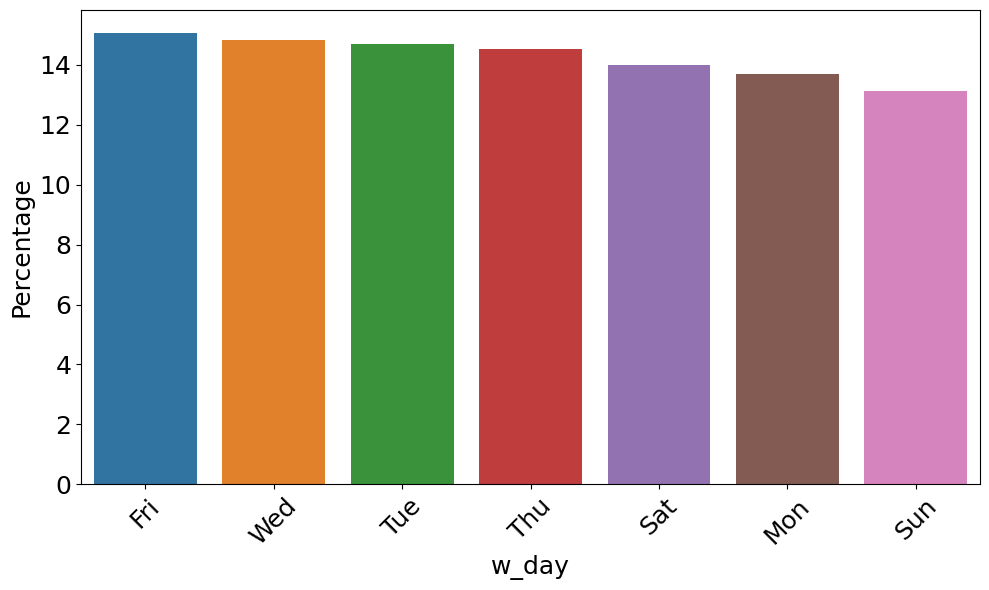

In [6]:
w_day_stats = df.groupby('w_day').size().reset_index(name='num_records').sort_values(by='num_records', ascending=False)
w_day_stats['percentage_of_total'] = round((w_day_stats['num_records'] / total_records) * 100,2)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(x='w_day', y='percentage_of_total', data=w_day_stats)

# Agregar etiquetas y título
plt.xlabel('w_day',fontsize=18)
plt.ylabel('Percentage',fontsize=18)

# Mostrar el gráfico
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('w_day.png')
plt.show()

,occupied,num_records,percentage_of_total,occupancy
0,0,69468,90.13,Aula buida
1,1,7610,9.87,Alumnes a clase


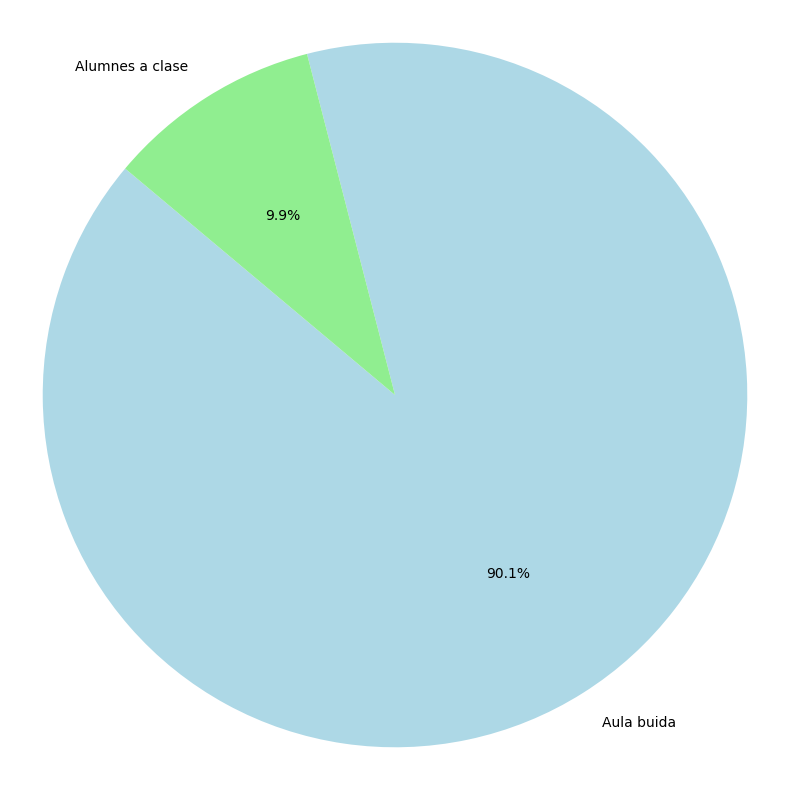

In [7]:
occupied_stats = df.groupby('occupied').size().reset_index(name='num_records').sort_values(by='num_records', ascending=False)
occupied_stats['percentage_of_total'] = round((occupied_stats['num_records'] / total_records) * 100,2)
occupied_stats['occupancy'] = occupied_stats['occupied'].map({0:"Aula buida", 1:"Alumnes a clase"})

display(occupied_stats)
# Crear un gráfico de quesos (pie chart)
plt.figure(figsize=(8, 8))  # Establecer el tamaño del gráfico

# Extraer los datos para el gráfico
sizes = occupied_stats['percentage_of_total']
labels = occupied_stats['occupancy']
colors = ['lightblue', 'lightgreen', 'lightcoral']  # Colores para cada sector

# Generar el gráfico de quesos
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


# Mostrar el gráfico
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.tight_layout()
plt.savefig('queso.png')
plt.show()

# Variables temp hum i co2

In [8]:
mesures = ['temp', 'hum', 'co2']
display(df[mesures].describe())

,temp,hum,co2
count,77078.000000,77078.000000,77078.000000
mean,28.056867,43.056792,463.803796
std,2.662729,6.631479,108.983907
min,20.001144,14.300000,301.000000
25%,26.300000,39.100000,416.000000
50%,28.000000,43.700000,434.500000
75%,29.910000,47.280000,464.000000
max,44.460000,64.180000,1989.000000


In [9]:
median_values_by_location = df[['temp', 'hum', 'co2', 'location']].groupby('location').mean()
display(median_values_by_location)

,temp,hum,co2
location,,,
Albea,29.955894,44.604027,465.716453
SantMiquel,26.370952,41.683190,462.105780


In [10]:
median_values_by_location_sensor = df[['temp', 'hum', 'co2', 'location', 'sensor_id']].groupby(
                                                            ['location','sensor_id']).median()
display(median_values_by_location_sensor)

temp        hum    co2
location   sensor_id                           
Albea      CO2_01     29.1075  46.705000  417.0
           CO2_02     29.7800  48.190000  441.0
           CO2_03     31.2100  42.400000  420.0
           CO2_04     27.0850  50.685000  433.0
           CO2_05     30.6900  45.085000  427.0
           CO2_06     30.8900  44.670000  441.0
SantMiquel CO2_01     27.4000  40.600000  428.0
           CO2_02     26.9000  42.800000  451.0
           CO2_03     27.0000  41.400836  428.0
           CO2_04     24.1000  47.550000  448.0
           CO2_05     26.6000  42.803955  444.0
           CO2_06     27.0000  40.800000  442.0

In [11]:
median_values_by_occupied = df[['temp', 'hum', 'co2', "occupied"]].groupby(
                                                            ["occupied"]).median()
display(median_values_by_occupied)

,temp,hum,co2
occupied,,,
0,28.0,43.768311,431.0
1,28.0,42.240453,568.0


In [12]:
median_values_by_location_sensor_occupied = df[['temp', 'hum', 'co2', "occupied", 'location', 'sensor_id']].groupby(
                                                            ['location', 'sensor_id',"occupied"]).median()
display(median_values_by_location_sensor_occupied)

temp     hum    co2
location   sensor_id occupied                          
Albea      CO2_01    0         29.100000  46.580  416.0
                     1         29.395000  47.880  676.0
           CO2_02    0         29.730000  48.240  439.0
                     1         30.395000  47.810  827.0
           CO2_03    0         31.220000  42.350  419.0
                     1         31.010000  44.650  700.5
           CO2_04    0         27.047500  50.530  430.0
                     1         27.260000  53.670  944.5
           CO2_05    0         30.720000  45.040  425.0
                     1         30.360000  45.820  638.0
           CO2_06    0         30.870000  44.740  440.0
                     1         31.080000  43.280  656.5
SantMiquel CO2_01    0         27.400000  40.700  424.0
                     1         27.500000  39.400  606.0
           CO2_02    0         27.000000  42.800  447.0
                     1         26.600000  41.600  584.0
           CO2_03    0         26.900000  41.800  423.0
                     1         27.400000  37.400  500.0
           CO2_04    0         24.000000  47.900  443.0
                     1         25.368507  42.100  530.0
           CO2_05    0         26.500000  43.000  441.0
                     1         27.300000  40.325  542.0
           CO2_06    0         26.900000  41.400  438.0
                     1         27.920016  37.200  503.5

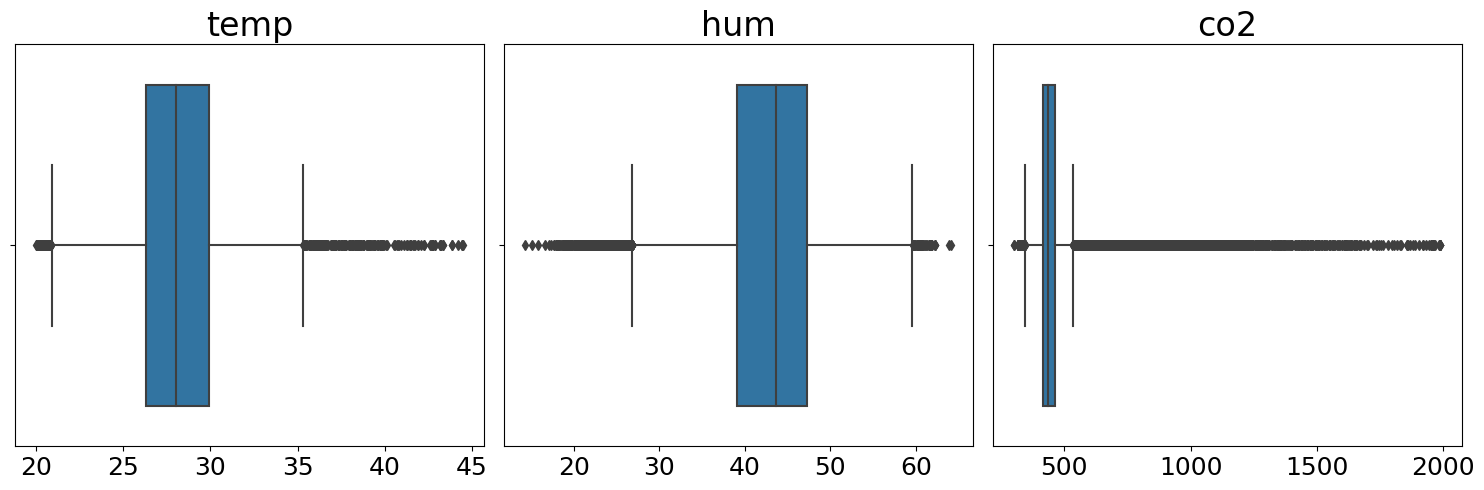

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre cada variable en mesures y crear un boxplot
for i, var in enumerate(mesures):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(var, fontsize=24)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.savefig('box.png')
plt.show()

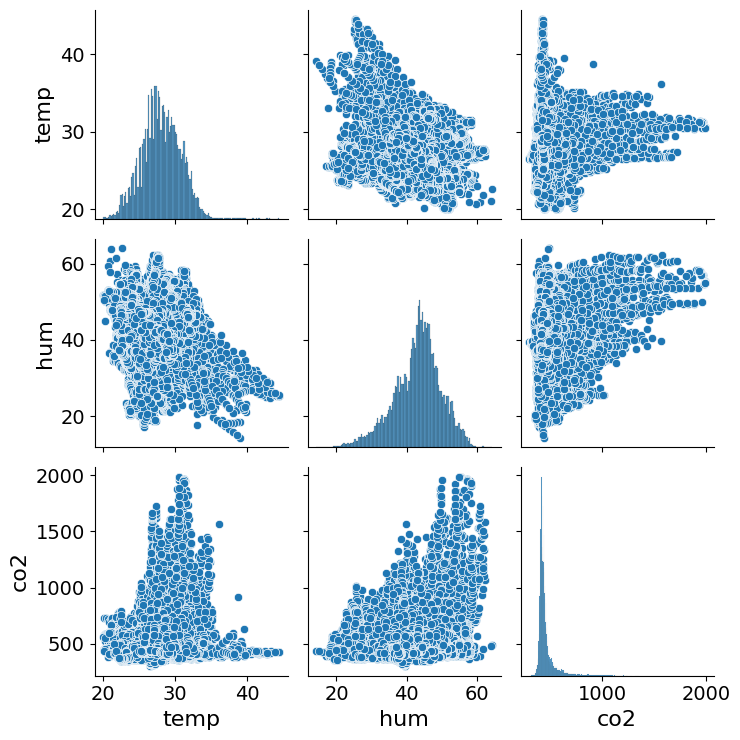

In [14]:
warnings.filterwarnings('ignore', category=FutureWarning)

pairplot = sns.pairplot(df[mesures])

for ax in pairplot.axes.flatten():
  
    ax.tick_params(axis='both', which='major', labelsize=14)

    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), fontsize=16)
plt.tight_layout()    
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show()

In [15]:
warnings.filterwarnings('ignore', category=UserWarning)
for var in mesures:
    stat, p_value = shapiro(df[var])
    print(f'Variable: {var}, p-valor = {round(p_value,3)}')

Variable: temp, p-valor = 0.0
Variable: hum, p-valor = 0.0
Variable: co2, p-valor = 0.0


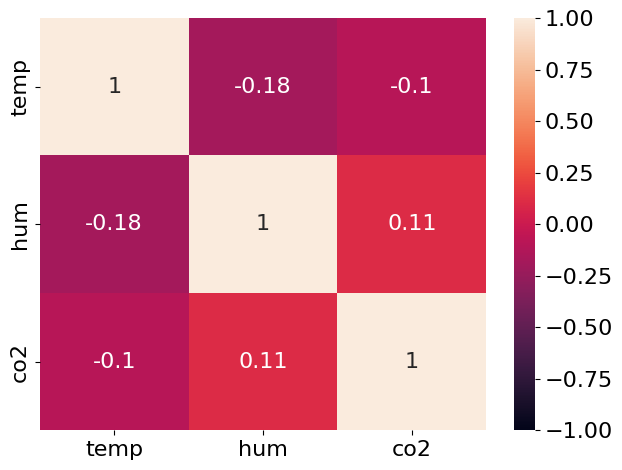

In [16]:
corr_matrix = df[mesures].corr(method='spearman')

heatmap = sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
plt.tight_layout()    
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()